<a href="https://colab.research.google.com/github/IR04dy/AI-Winter-Training/blob/main/Time_series_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Airline passenger prediction problem.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
dataset = pd.read_csv("/content/AirPassengers.csv", usecols=[1], engine='python')

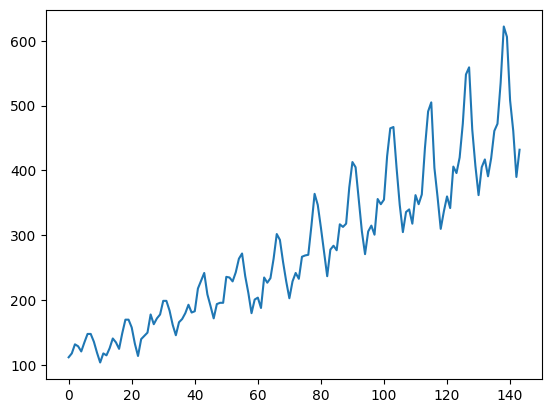

In [ ]:
plt.plot(dataset)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
np.random.seed(7)

In [ ]:
dataframe = pd.read_csv('/content/AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

Normalization

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

Train Test Split

In [ ]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

In [ ]:
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


The Function takes two arguments: dataset, which is a Numpy array that we want to convet into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period -defult is 1-.

In [ ]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

X = t

Y = t+1

In [ ]:
prev_step = 1
trainX, trainY = create_dataset(train, prev_step)
testX, testY = create_dataset(test, prev_step)

reshape input to be [samples, time step, features]


In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

1 input layer, 4 LTSM neurons, and output layer that make a single predicted value.

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape = (1, prev_step)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 3s - loss: 0.0422 - 3s/epoch - 29ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0208 - 220ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0149 - 285ms/epoch - 3ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0133 - 260ms/epoch - 3ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0122 - 215ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0111 - 206ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0101 - 210ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0089 - 191ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0079 - 331ms/epoch - 4ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0068 - 389ms/epoch - 4ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0059 - 350ms/epoch - 4ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0050 - 312ms/epoch - 3ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0042 - 364ms/epoch - 4ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0037 - 369ms/epoch - 4ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0031 - 343ms/epoch - 4ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0027 - 175ms/epoc

Prediction

In [ ]:
trainPred = model.predict(trainX)
testPred = model.predict(testX)

trainPred = scaler.inverse_transform(trainPred)
trainY = scaler.inverse_transform([trainY])

testPred = scaler.inverse_transform(testPred)
testY = scaler.inverse_transform([testY])

2/2 [==============================] - 0s 8ms/step


In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPred[:, 0]))
print('Train Score: %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPred[:, 0]))
print('Test Score: %.2f RMSE' %(testScore))

Train Score: 22.73 RMSE
Test Score: 53.31 RMSE


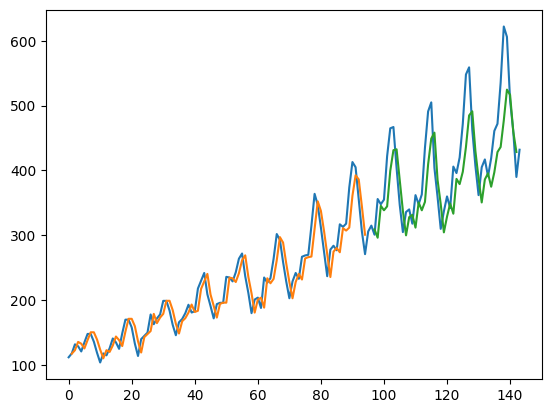

In [ ]:
trainPredPlot = np.empty_like(dataset)
trainPredPlot[:,:] = np.nan
trainPredPlot[prev_step:len(trainPred)+prev_step, :] = trainPred

testPredPlot = np.empty_like(dataset)
testPredPlot[:, :] = np.nan
testPredPlot[len(trainPred)+(prev_step*2)+1:len(dataset)-1, :] = testPred



plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredPlot)
plt.plot(testPredPlot)

plt.show()
